In [1]:
import numpy as np
import pandas as pd
import os 
import sys
sys.path.append("../")
from shared_casual_discovery import *

/Users/abvoron/repos/methods-for-causal-discovery/vdos/../shared_casual_discovery.py:483: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


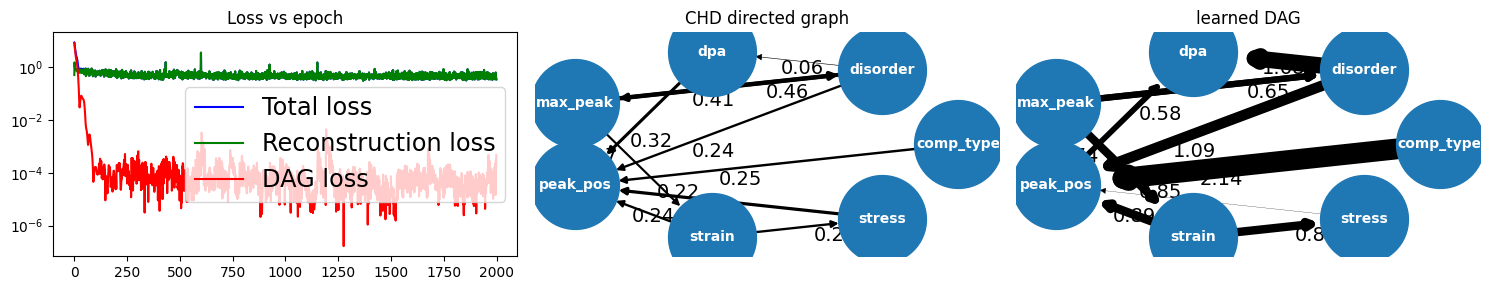

In [2]:
data_dir = "data"
attr = ["comp_type", "disorder", "dpa", "max_peak", "peak_pos", "strain", "stress"]
data = {att: np.load(os.path.join(data_dir, att+".npy")) for att in attr}
data_df = pd.DataFrame.from_dict(data)

# chd graph weights
chd_mat = np.array([[0.,   0.,   0.,   0.,   0.25, 0.,   0.  ],
                   [0.,   0.,   0.06, 0.41, 0.24, 0.,   0.  ],
                   [0.,   0.,   0.,   0.,   0.32, 0.,   0.  ],
                   [0.,   0.46, 0.,   0.,   0.27, 0.22, 0.  ],
                   [0.,   0.,   0.,   0.,   0.,   0.,   0.  ],
                   [0.,   0.,   0.,   0.,   0.24, 0.,   0.24],
                   [0.,   0.,   0.,   0.,   0.33, 0.,   0.  ]])

out = find_direction(data_df,
                    M=chd_mat,
                    epochs=2000,
                    pretrain_epochs = 100, pre_lr = 1e-2,
                    d1_weight = 1.0, lr = 2e-2,
                    rng_seed=7,
                    plots=True,
                    save_fig=None
                   )
loss, mw_hist, _ = out